import pandas as pd

In [618]:
# filepath to CLEANED need data
filepath = 'https://raw.githubusercontent.com/LondonEnergyMap/cleandata/master/need_ldn.csv'

# read csv into dataframe
df_all = pd.read_csv(filepath)
df_all.head()

,Unnamed: 0,hid,imd_eng,e7,mainheatfuel,age,proptype,floorarea_band,epc_band,loftdepth,walls,cwi,cwi_year,loftins,loftins_year,boiler,boiler_year,gcons,year,econs
0,0,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,2005,12500.0
1,1,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,22000.0,2007,12500.0
2,2,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,2008,11000.0
3,3,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,23000.0,2009,9500.0
4,4,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,2010,10000.0


In [619]:
len(df_all.hid.unique())

5275

In [620]:
df_all.year.unique()

array([2005, 2007, 2008, 2009, 2010, 2011, 2012, 2006])

In [621]:
df = df_all[df_all.year==2012]
len(df)

5115

In [622]:
df.columns

Index(['Unnamed: 0', 'hid', 'imd_eng', 'e7', 'mainheatfuel', 'age', 'proptype',
       'floorarea_band', 'epc_band', 'loftdepth', 'walls', 'cwi', 'cwi_year',
       'loftins', 'loftins_year', 'boiler', 'boiler_year', 'gcons', 'year',
       'econs'],
      dtype='object')

In [623]:
df.e7.unique()

array([nan,  1.])

In [624]:
l = []
for i in range(len(df.columns)):
    col = df.columns[i]
    l.append(df[col].count())

In [625]:
l

[5115,
 5115,
 5115,
 499,
 5115,
 5115,
 5115,
 5115,
 5115,
 5115,
 5115,
 347,
 347,
 563,
 563,
 1431,
 1431,
 5115,
 5115,
 5115]

In [626]:
len(df[df.loftdepth==99])

2377

In [627]:
df.loftins_year.unique()

array([  nan, 2011., 2009., 2004., 2012., 2010., 2007., 2006., 2008.,
       2005.])

In [628]:
# explore gcons with age, property type, floorarea, imd, epc

t = df[['imd_eng', 'mainheatfuel', 'age', 'proptype','epc_band', 'loftdepth', 'walls', 'floorarea_band', 'cwi','gcons', 'econs']]
c = temp.columns

# the number of columns not to plot
k = 3
n = len(c)-k

temp = t.copy()
temp['age'] = temp['age'] - 100
temp['proptype'] = temp['proptype'] - 100
temp['gconsperarea'] = temp['gcons'] / (temp['floorarea_band']*50)

maxgcons = 50000 + 5000
maxecons = 25000 + 5000
n
c

Index(['imd_eng', 'mainheatfuel', 'age', 'proptype', 'epc_band', 'loftdepth',
       'walls', 'floorarea_band', 'cwi', 'gcons', 'econs', 'gconsperarea'],
      dtype='object')

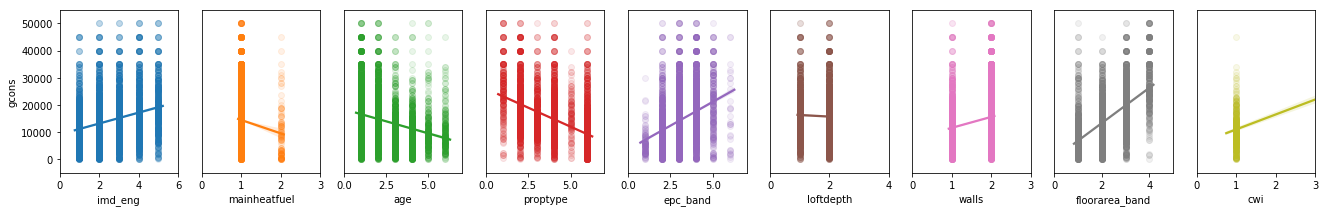

In [629]:
from matplotlib import pyplot as plt
import seaborn as sns


f, axes = plt.subplots(1, n, figsize=(2.5*n,3))
for i in range(len(c)-k):
    xax = len(temp[c[i]].unique())+1
    if c[i]=='loftdepth':
        t = temp[temp.loftdepth!=99]
        sns.regplot(x=t[c[i]], y=t.gcons, scatter_kws={'alpha':0.1}, ax=axes[i])
    else:
        sns.regplot(x=temp[c[i]], y=temp.gcons, scatter_kws={'alpha':0.1}, ax=axes[i])
        
    axes[i].set_xlim([0,xax])
    axes[i].set_ylim([-5000,maxgcons])
    if i!=0:
        axes[i].get_yaxis().set_ticks([])
        axes[i].set_ylabel('')
plt.show()

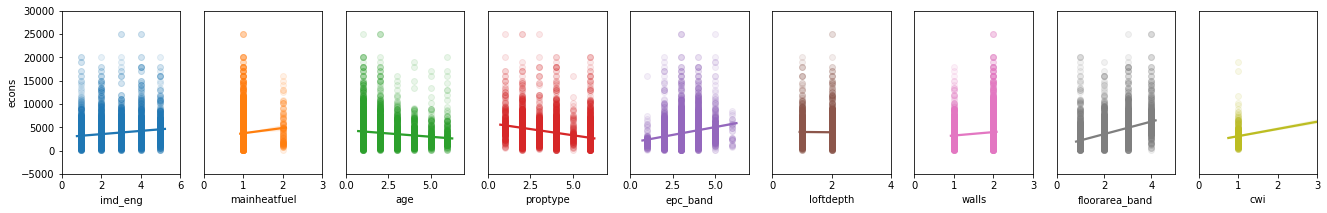

In [630]:
f, axes = plt.subplots(1, n, figsize=(2.5*n,3))
for i in range(len(c)-k):
    xax = len(temp[c[i]].unique())+1
    if c[i]=='loftdepth':
        t = temp[temp.loftdepth!=99]
        sns.regplot(x=t[c[i]], y=t.econs, scatter_kws={'alpha':0.1}, ax=axes[i])
    else:
        sns.regplot(x=temp[c[i]], y=temp.econs, scatter_kws={'alpha':0.1}, ax=axes[i])
    axes[i].set_xlim([0,xax])
    axes[i].set_ylim([-5000,maxecons])
    if i!=0:
        axes[i].get_yaxis().set_ticks([])
        axes[i].set_ylabel('')
plt.show()

In [631]:
# looking at effects of cwi, loftins, boiler

dfcwi = df_all[df_all.cwi==1]
dfcwi=dfcwi.sort_values(['hid'])
dfcwi.head(10)

,Unnamed: 0,hid,imd_eng,e7,mainheatfuel,age,proptype,floorarea_band,epc_band,loftdepth,walls,cwi,cwi_year,loftins,loftins_year,boiler,boiler_year,gcons,year,econs
39,39,57,5.0,NaN,1,103,106,2,3,2,2,1.0,2012.0,NaN,NaN,NaN,NaN,13900.0,2010,3200.0
40,40,57,5.0,NaN,1,103,106,2,3,2,2,1.0,2012.0,NaN,NaN,NaN,NaN,12500.0,2012,1550.0
41,41,57,5.0,NaN,1,103,106,2,3,2,2,1.0,2012.0,NaN,NaN,NaN,NaN,14000.0,2011,3250.0
42,42,57,5.0,NaN,1,103,106,2,3,2,2,1.0,2012.0,NaN,NaN,NaN,NaN,15900.0,2005,2450.0
43,43,57,5.0,NaN,1,103,106,2,3,2,2,1.0,2012.0,NaN,NaN,NaN,NaN,13000.0,2009,3300.0
44,44,57,5.0,NaN,1,103,106,2,3,2,2,1.0,2012.0,NaN,NaN,NaN,NaN,18500.0,2006,2650.0
45,45,57,5.0,NaN,1,103,106,2,3,2,2,1.0,2012.0,NaN,NaN,NaN,NaN,16000.0,2007,2800.0
46,46,57,5.0,NaN,1,103,106,2,3,2,2,1.0,2012.0,NaN,NaN,NaN,NaN,14800.0,2008,3600.0
156,156,168,2.0,NaN,1,103,104,2,2,2,2,1.0,2007.0,NaN,NaN,1.0,2007.0,31000.0,2009,1550.0
155,155,168,2.0,NaN,1,103,104,2,2,2,2,1.0,2007.0,NaN,NaN,1.0,2007.0,17500.0,2006,2150.0


In [632]:
# create new column of hue colors depending on year of intervention

def colorgen_cwi(dfcwi):
    if dfcwi.year > dfcwi.cwi_year:
        c = 1
    if dfcwi.year < dfcwi.cwi_year:
        c = -1
    if dfcwi.year == dfcwi.cwi_year:
        c = 0
    return c

dfcwi['cwi_hue']= dfcwi.apply(colorgen_cwi, axis=1)
dfcwi['cwi_hue'].head()     

39   -1
40    0
41   -1
42   -1
43   -1
Name: cwi_hue, dtype: int64

In [633]:
dfcwi.groupby(['age']).nunique()

,Unnamed: 0,hid,imd_eng,e7,mainheatfuel,age,proptype,floorarea_band,epc_band,loftdepth,...,cwi,cwi_year,loftins,loftins_year,boiler,boiler_year,gcons,year,econs,cwi_hue
age,,,,,,,,,,,,,,,,,,,,,
101,64,8,3,1,1,1,5,3,3,2,...,1,6,1,4,1,2,42,8,49,3
102,573,73,5,1,2,1,6,4,5,3,...,1,9,1,7,1,7,119,8,173,3
103,1006,130,5,1,2,1,6,4,6,3,...,1,9,1,9,1,9,127,8,185,3
104,977,130,5,1,2,1,6,4,6,3,...,1,9,1,7,1,8,126,8,158,3
105,94,13,4,1,1,1,4,4,2,3,...,1,7,1,2,1,2,52,8,69,3
106,16,2,2,0,1,1,2,2,1,1,...,1,2,0,0,1,1,14,8,15,3


In [634]:
dfcwi.groupby(['floorarea_band']).nunique()

,Unnamed: 0,hid,imd_eng,e7,mainheatfuel,age,proptype,floorarea_band,epc_band,loftdepth,...,cwi,cwi_year,loftins,loftins_year,boiler,boiler_year,gcons,year,econs,cwi_hue
floorarea_band,,,,,,,,,,,,,,,,,,,,,
1,750,102,4,1,2,5,3,1,4,3,...,1,9,1,4,1,9,97,8,131,3
2,1378,178,5,1,2,6,6,1,6,3,...,1,9,1,9,1,8,127,8,183,3
3,532,67,5,1,1,6,5,1,4,3,...,1,9,1,7,1,7,109,8,179,3
4,70,9,3,1,1,4,2,1,3,3,...,1,7,1,2,1,3,25,8,57,3


In [635]:
dfcwi.groupby(['proptype']).nunique()

,Unnamed: 0,hid,imd_eng,e7,mainheatfuel,age,proptype,floorarea_band,epc_band,loftdepth,...,cwi,cwi_year,loftins,loftins_year,boiler,boiler_year,gcons,year,econs,cwi_hue
proptype,,,,,,,,,,,,,,,,,,,,,
101,134,17,4,1,1,4,1,3,4,3,...,1,7,1,3,1,6,48,8,98,3
102,483,61,5,1,1,5,1,3,4,3,...,1,8,1,8,1,7,109,8,156,3
103,395,51,5,1,1,5,1,3,3,3,...,1,9,1,7,1,7,111,8,133,3
104,486,62,4,1,2,6,1,3,5,3,...,1,9,1,7,1,8,118,8,147,3
105,64,8,5,1,1,4,1,2,3,3,...,1,5,1,4,1,2,41,8,52,3
106,1168,157,5,1,2,5,1,2,6,3,...,1,9,1,5,1,9,118,8,160,3


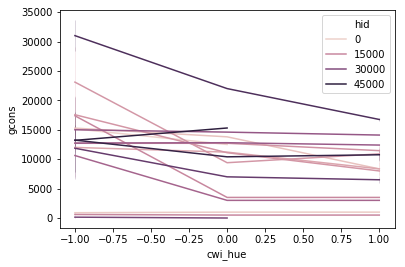

In [636]:
dfcwi_temp = dfcwi[(dfcwi.proptype==106) & (dfcwi.age==103) & (dfcwi.floorarea_band==2)]

#sns.scatterplot(data=dfcwi_temp, x='cwi_hue', y='gcons')#, hue='cwi_hue')

sns.lineplot(data=dfcwi_temp, x='cwi_hue', y='gcons', hue='hid')
plt.show()

In [637]:
#dfloft_temp = dfloft[(dfloft.proptype==popular_prop) & (dfloft.age==popular_age) & (dfloft.floorarea_band==popular_area)]
dfcwi_temp = dfcwi

# reassign hid to equally spaced integer values
# In the first line, you assign a number to each unique element in your list (stored in the dictionary d; you can easily create it using a dictionary comprehension; set returns the unique elements of names).
#Let us use enumerate function in dictionary comprehension. If you have not used enumerate: enumerate can take any thing iterable as input and returns element and its index.
# Here we use enumerate function on the list to create index and list element tuples and use them to create a dictionary with dict comprehension. We create a dictionary with elements of the list as the keys and the index of elements as the values. Such dictionaries with element index are often useful in a variety of scenarios.

d = {x: i for i, x in enumerate(set(dfcwi_temp.hid))}

dfcwi_temp['hid2'] = [d[x] for x in dfcwi_temp['hid']]

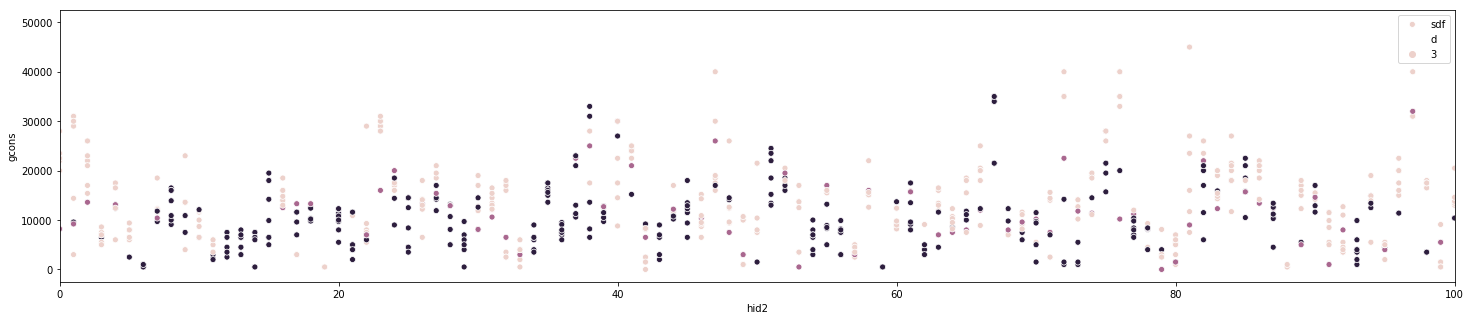

In [638]:
# sns.scatterplot(data=dfloft_temp, x='loftins_hue', y='gcons')
plt.figure(figsize=(25, 5))
g = sns.scatterplot(data=dfcwi_temp, x='hid2', y='gcons', hue='cwi_hue')
plt.xlim([0,100])
g.legend(['sdf', 'd', '3'])
plt.show()

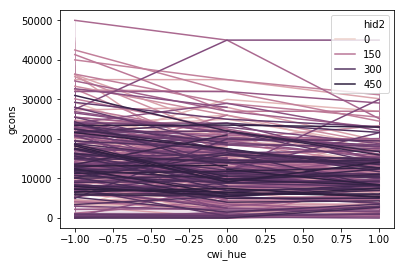

In [639]:

sns.lineplot(data=dfcwi_temp, x='cwi_hue', y='gcons', hue='hid2')

plt.show()

In [640]:
# create new column of hue colors depending on year of intervention
dfl = df_all[df_all.loftins==1]
dfloft = dfl.copy()

def colorgen_loft(dfloft):
    if dfloft.year > dfloft.loftins_year:
        c = 1
    if dfloft.year < dfloft.loftins_year:
        c = -1
    if dfloft.year == dfloft.loftins_year:
        c = 0
    return c

dfloft['loftins_hue']= dfloft.apply(colorgen_loft, axis=1)
dfloft['loftins_hue'].head()  

55   -1
56    1
57   -1
58   -1
59    0
Name: loftins_hue, dtype: int64

In [641]:
popular_age = dfloft.groupby(['age']).nunique().hid.idxmax()
popular_prop = dfloft.groupby(['proptype']).nunique().hid.idxmax()
popular_area = dfloft.groupby(['floorarea_band']).nunique().hid.idxmax()

In [642]:
#dfloft_temp = dfloft[(dfloft.proptype==popular_prop) & (dfloft.age==popular_age) & (dfloft.floorarea_band==popular_area)]
dfloft_temp = dfloft

# reassign hid to equally spaced integer values
# In the first line, you assign a number to each unique element in your list (stored in the dictionary d; you can easily create it using a dictionary comprehension; set returns the unique elements of names).
#Let us use enumerate function in dictionary comprehension. If you have not used enumerate: enumerate can take any thing iterable as input and returns element and its index.
# Here we use enumerate function on the list to create index and list element tuples and use them to create a dictionary with dict comprehension. We create a dictionary with elements of the list as the keys and the index of elements as the values. Such dictionaries with element index are often useful in a variety of scenarios.

d = {x: i for i, x in enumerate(set(dfloft_temp.hid))}

dfloft_temp['hid2'] = [d[x] for x in dfloft_temp['hid']]

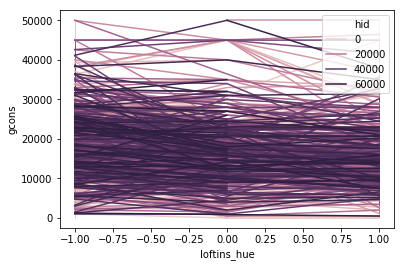

In [643]:
sns.lineplot(data=dfloft_temp, x='loftins_hue', y='gcons', hue='hid')
plt.show()

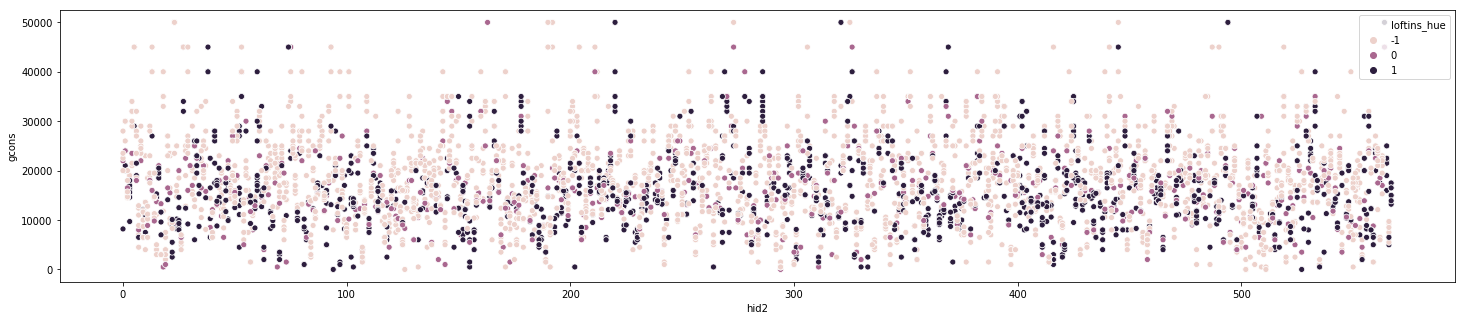

In [644]:
# sns.scatterplot(data=dfloft_temp, x='loftins_hue', y='gcons')
plt.figure(figsize=(25, 5))
sns.scatterplot(data=dfloft_temp, x='hid2', y='gcons', hue='loftins_hue')
plt.show()

In [645]:
# create new column of hue colors depending on year of intervention
dfb = df_all[df_all.boiler==1]
dfboiler = dfb.copy()

def colorgen_boiler(dfboiler):
    if dfboiler.year > dfboiler.boiler_year:
        c = 1
    if dfboiler.year < dfboiler.boiler_year:
        c = -1
    if dfboiler.year == dfboiler.boiler_year:
        c = 0
    return c

dfboiler['boiler_hue']= dfboiler.apply(colorgen_boiler, axis=1)
dfboiler['boiler_hue'].head() 

63   -1
64    0
65   -1
66   -1
67    1
Name: boiler_hue, dtype: int64

In [646]:

popular_age = dfboiler.groupby(['age']).nunique().hid.idxmax()
popular_prop = dfboiler.groupby(['proptype']).nunique().hid.idxmax()
popular_area = dfboiler.groupby(['floorarea_band']).nunique().hid.idxmax()

In [647]:
#dfboiler_temp = dfboiler[(dfboiler.proptype==popular_prop) & (dfloft.age==popular_age) & (dfloft.floorarea_band==popular_area)]

dfboiler_temp = dfboiler
len(dfboiler_temp.hid.unique())


1453

In [648]:
# reassign hid to equally spaced integer values
# In the first line, you assign a number to each unique element in your list (stored in the dictionary d; you can easily create it using a dictionary comprehension; set returns the unique elements of names).
#Let us use enumerate function in dictionary comprehension. If you have not used enumerate: enumerate can take any thing iterable as input and returns element and its index.
# Here we use enumerate function on the list to create index and list element tuples and use them to create a dictionary with dict comprehension. We create a dictionary with elements of the list as the keys and the index of elements as the values. Such dictionaries with element index are often useful in a variety of scenarios.

d = {x: i for i, x in enumerate(set(dfboiler_temp.hid))}

dfboiler_temp['hid2'] = [d[x] for x in dfboiler_temp['hid']]

In [649]:
# find percentage of houses that have lower consumption before and after intervention

# compare whether before and after average consumption (ignoring year of intervention)

dfb = dfboiler_temp.groupby(['hid2','boiler_hue']).mean()

dfb = dfb[['gcons']]
dfb.head()

gcons
hid2 boiler_hue         
0    -1          23250.0
      0          14400.0
      1           9400.0
1    -1          18500.0
      0           6000.0

In [650]:
d = dfb.unstack()
d.head()

gcons                  
boiler_hue       -1        0        1
hid2                                 
0           23250.0  14400.0   9400.0
1           18500.0   6000.0      NaN
2           16500.0  19000.0  15350.0
3           17000.0  14100.0   7520.0
4           22800.0  18000.0  22250.0

In [651]:
d.columns = d.columns.droplevel(level=1)


In [652]:
d.columns = ['before', 'during', 'after']

In [653]:
d = d.dropna()
d['diff'] = d.after - d.before

In [654]:
import numpy as np

d['effective'] = np.where(d['diff']<0, '1', '0')
d.head()

,before,during,after,diff,effective
hid2,,,,,
0,23250.0,14400.0,9400.0,-13850.0,1
2,16500.0,19000.0,15350.0,-1150.0,1
3,17000.0,14100.0,7520.0,-9480.0,1
4,22800.0,18000.0,22250.0,-550.0,1
5,24875.0,17500.0,20000.0,-4875.0,1


In [655]:
nhouses = len(d.index)
d['effective']=pd.to_numeric(d.effective)
eff_percent = d['effective'].sum() / nhouses
eff_percent

0.737108190091001

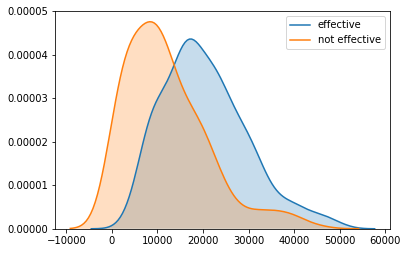

In [656]:
d_eff = d[d.effective==1]
d_neff = d[d.effective==0]
sns.kdeplot(d_eff.before, shade=True)
sns.kdeplot(d_neff.before, shade=True)
plt.legend(['effective', 'not effective'])

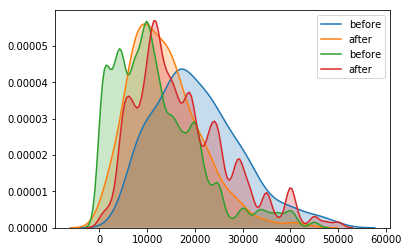

In [686]:
sns.kdeplot(d_eff.before, shade=True)
sns.kdeplot(d_eff.after, shade=True)
sns.kdeplot(d_neff.before, bw=1000, shade=True)
sns.kdeplot(d_neff.after, bw=1000, shade=True)

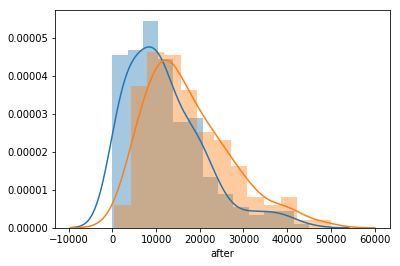

In [676]:
sns.distplot(d_neff.before)
sns.distplot(d_neff.after)

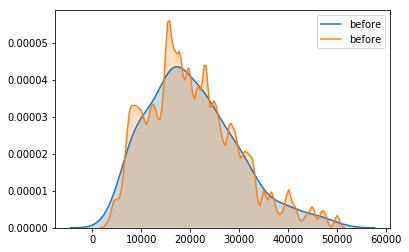

In [682]:
sns.kdeplot(d_eff.before, shade=True)
sns.kdeplot(d_eff.before, bw=500, shade=True)

In [658]:
d.dtypes

before       float64
during       float64
after        float64
diff         float64
effective      int64
dtype: object

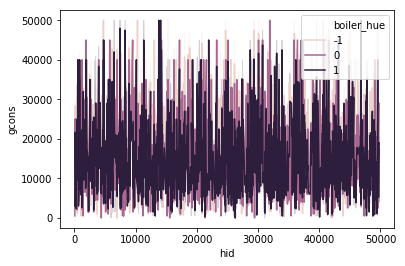

In [659]:
sns.lineplot(data=dfboiler_temp, x='hid', y='gcons', hue='boiler_hue')
plt.show()

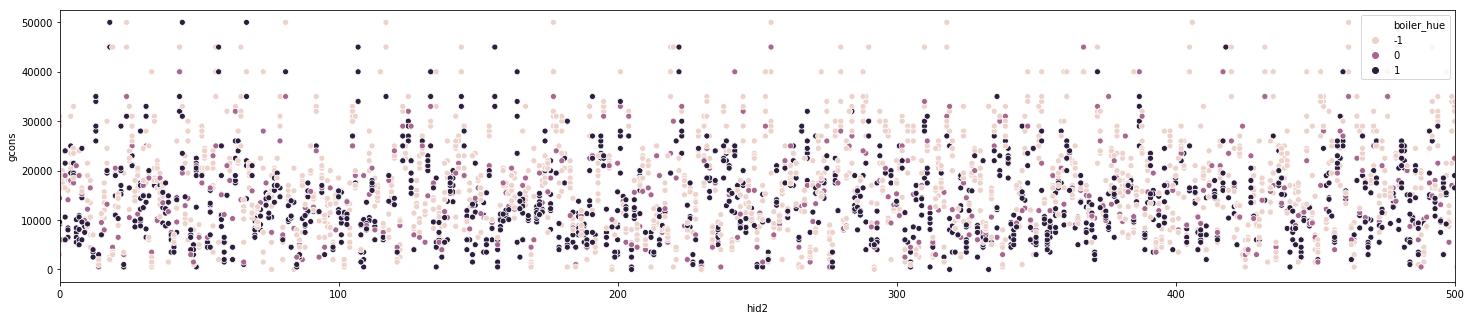

In [660]:

plt.figure(figsize=(25, 5))
sns.scatterplot(data=dfboiler_temp, x='hid2', y='gcons', hue='boiler_hue')
plt.xlim([0, 500])
plt.show()

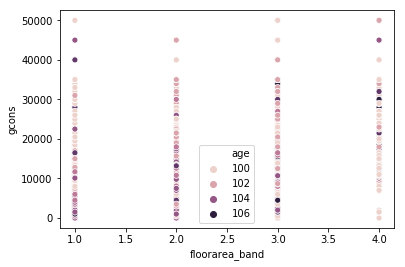

In [661]:
# look individually at age, proptype, floorarea_band, epc_band

sns.scatterplot(data=df, x='floorarea_band', y='gcons', hue='age')
plt.show()

In [662]:
# split training test data

from sklearn.model_selection import train_test_split
df = df.fillna(value=0)
x = df[['floorarea_band', 'age', 'proptype', 'epc_band', 'imd_eng', 'mainheatfuel', 'walls', 'cwi', 'loftins', 'boiler']]
y = df.gcons

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

In [663]:
# build machine learning model

from sklearn.linear_model import LinearRegression

lrmodel = LinearRegression()



In [664]:
lrmodel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [665]:
predictions = lrmodel.predict(x_test)

In [666]:
lrmodel.score(x_train, y_train)

0.40244645033474236

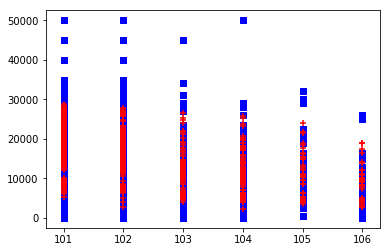

In [667]:
f = plt.figure()
ax1 = f.add_subplot(111)
ax1.scatter(x_test.iloc[:,1], y_test, c='b', marker="s")
ax1.scatter(x_test.iloc[:,1], predictions, c='r', marker="+")

plt.show()



In [668]:
x_test.shape

(1023, 10)

In [669]:
y_test.shape

(1023,)

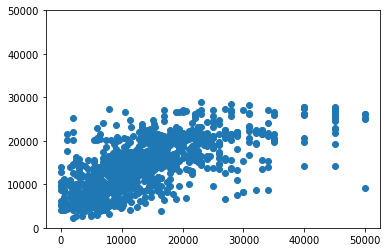

In [670]:
plt.scatter(y_test, predictions)
plt.ylim([0, 50000])
plt.show()

In [671]:
# explore gcons with age, property type, floorarea, imd, epc

df_inter = df_all[(df_all.year==2012) ]


t = df_inter[['cwi', 'loftins', 'boiler', 'gcons', 'econs']]
t = t.fillna(value=0)

c = temp.columns

# the number of columns not to plot
k = 2
n = len(c)-k

temp = t.copy()


maxgcons = 50000 + 5000
maxecons = 25000 + 5000




KeyError: 'imd_eng'

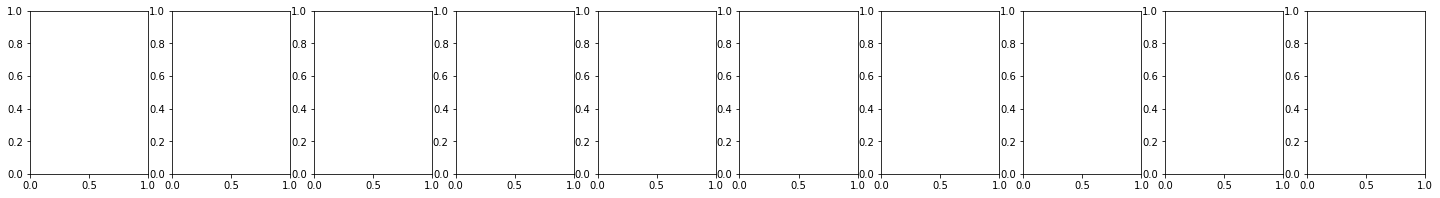

In [672]:
f, axes = plt.subplots(1, n, figsize=(2.5*n,3))

for i in range(len(c)-k):
    xax = len(temp[c[i]].unique())
    sns.regplot(x=temp[c[i]], y=temp.gcons, scatter_kws={'alpha':0.1}, ax=axes[i])
    axes[i].set_xlim([-1,xax])
    axes[i].set_ylim([-5000,maxgcons])
    if i!=0:
        axes[i].get_yaxis().set_ticks([])
        axes[i].set_ylabel('')
plt.show()

In [ ]:
f, axes = plt.subplots(1, n, figsize=(2.5*n,3))

for i in range(len(c)-k):
    xax = len(temp[c[i]].unique())
    sns.regplot(x=temp[c[i]], y=temp.econs, scatter_kws={'alpha':0.1}, ax=axes[i])
    axes[i].set_xlim([-1,xax])
    axes[i].set_ylim([-5000,maxecons])
    if i!=0:
        axes[i].get_yaxis().set_ticks([])
        axes[i].set_ylabel('')
plt.show()

In [ ]:
df_all.walls.unique()